## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import tensorflow as tf
print(tf.__version__) 
import keras_tuner as kt
print(kt.__version__)

2.17.0
1.4.7


There are 80 csv files in the current version of the dataset:


In [4]:
'''for dirname, _, filenames in os.walk('kaggle\input\DroneFlightData'):
    for filename in filenames:
        print(os.path.join(dirname, filenamev ))
'''

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'list'

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [4]:
'''# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()'''


In [5]:
'''# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()'''


In [6]:
'''# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()'''


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/DroneFlightData/WithoutTakeoff/2020-0616/01/06162020_111957.csv

In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 06162020_111957.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('kaggle/input/DroneFlightData/WithoutTakeoff/2020-0616/01/06162020_111957.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '06162020_111957.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 19 rows and 19 columns


Let's take a quick look at what the data looks like:

In [6]:
df1.head(5)

,date,time,lat,lon,alt,x_gyro,y_gyro,z_gyro,x_acc,y_acc,z_acc,north,east,down,pitch,yaw,roll,wind_speed,wind_direction
0,2020/6/16,11:20:09,22.902818,120.273167,20.761,-195,141,54,18,105,-970,-0.916279,0.442863,-20.761206,-0.060314,-1.831719,-0.110093,20,270
1,2020/6/16,11:20:12,22.902750,120.273177,21.107,-29,68,-112,-145,-35,-1027,-8.485707,1.484865,-21.107281,-0.179851,3.017138,0.013227,20,270
2,2020/6/16,11:20:15,22.902640,120.273196,20.383,-43,-13,-16,-168,-100,-1021,-20.810673,3.492481,-20.383051,-0.121941,2.980288,0.101160,20,270
3,2020/6/16,11:20:18,22.902524,120.273223,20.023,22,-73,50,-148,-143,-1017,-33.705063,6.193039,-20.023983,-0.152821,3.023595,0.162181,20,270
4,2020/6/16,11:20:21,22.902405,120.273240,20.337,132,147,25,-99,-40,-972,-46.941650,8.006710,-20.337950,-0.058899,3.137253,0.148595,20,270


Distribution graphs (histogram/bar graph) of sampled columns:

In [7]:
# Convert date and time to datetime
df1['datetime'] = pd.to_datetime(df1['date'] + ' ' + df1['time'])

# Extract useful numerical features from datetime (Year, Month, Day, Hour, Minute, Second)
df1['year'] = df1['datetime'].dt.year
df1['month'] = df1['datetime'].dt.month
df1['day'] = df1['datetime'].dt.day
df1['hour'] = df1['datetime'].dt.hour
df1['minute'] = df1['datetime'].dt.minute
df1['second'] = df1['datetime'].dt.second

# Drop original date, time, and datetime columns (no longer needed)
df1 = df1.drop(columns=['date', 'time', 'datetime'])

# Now your df looks like this:
print(df1)

          lat         lon     alt  x_gyro  y_gyro  z_gyro  x_acc  y_acc  \
0   22.902818  120.273167  20.761    -195     141      54     18    105   
1   22.902750  120.273177  21.107     -29      68    -112   -145    -35   
2   22.902640  120.273196  20.383     -43     -13     -16   -168   -100   
3   22.902524  120.273223  20.023      22     -73      50   -148   -143   
4   22.902405  120.273240  20.337     132     147      25    -99    -40   
5   22.902342  120.273208  20.165       2      64     134   -187     21   
6   22.902324  120.273098  20.227      48     -42     -11   -233    -10   
7   22.902301  120.272964  20.157     -13     159      -6   -248     14   
8   22.902286  120.272826  20.173      28      -8      27   -285     64   
9   22.902287  120.272718  20.259      76     -77     736   -105     67   
10  22.902359  120.272692  20.328      94      44      36    -46    114   
11  22.902475  120.272673  20.265      12      69       9    -85    108   
12  22.902609  120.272654

In [8]:
df1.dtypes

lat               float64
lon               float64
alt               float64
x_gyro              int64
y_gyro              int64
z_gyro              int64
x_acc               int64
y_acc               int64
z_acc               int64
north             float64
east              float64
down              float64
pitch             float64
yaw               float64
roll              float64
wind_speed          int64
wind_direction      int64
year                int32
month               int32
day                 int32
hour                int32
minute              int32
second              int32
dtype: object

In [9]:
df1.columns.tolist()

['lat',
 'lon',
 'alt',
 'x_gyro',
 'y_gyro',
 'z_gyro',
 'x_acc',
 'y_acc',
 'z_acc',
 'north',
 'east',
 'down',
 'pitch',
 'yaw',
 'roll',
 'wind_speed',
 'wind_direction',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second']

<Axes: >

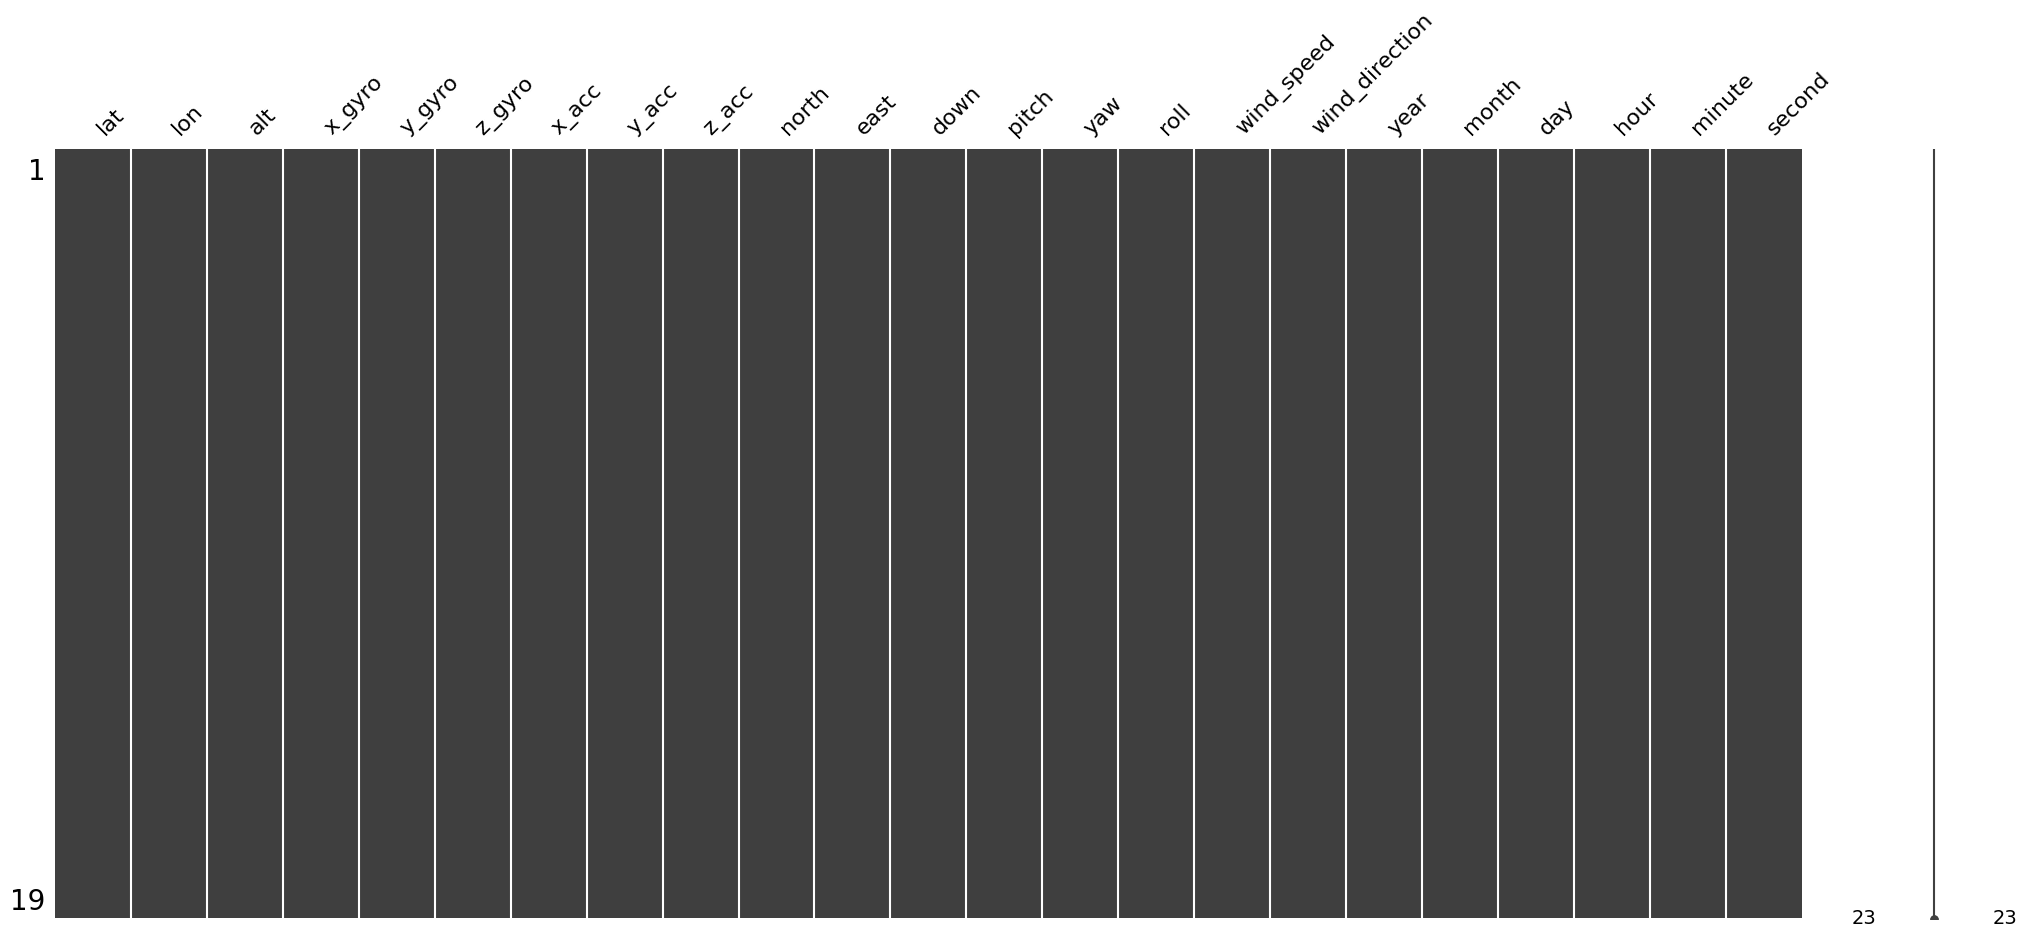

In [10]:
#pip install missingno
df1.isnull().sum()
import missingno as msno

# Visualize missing data
msno.matrix(df1)

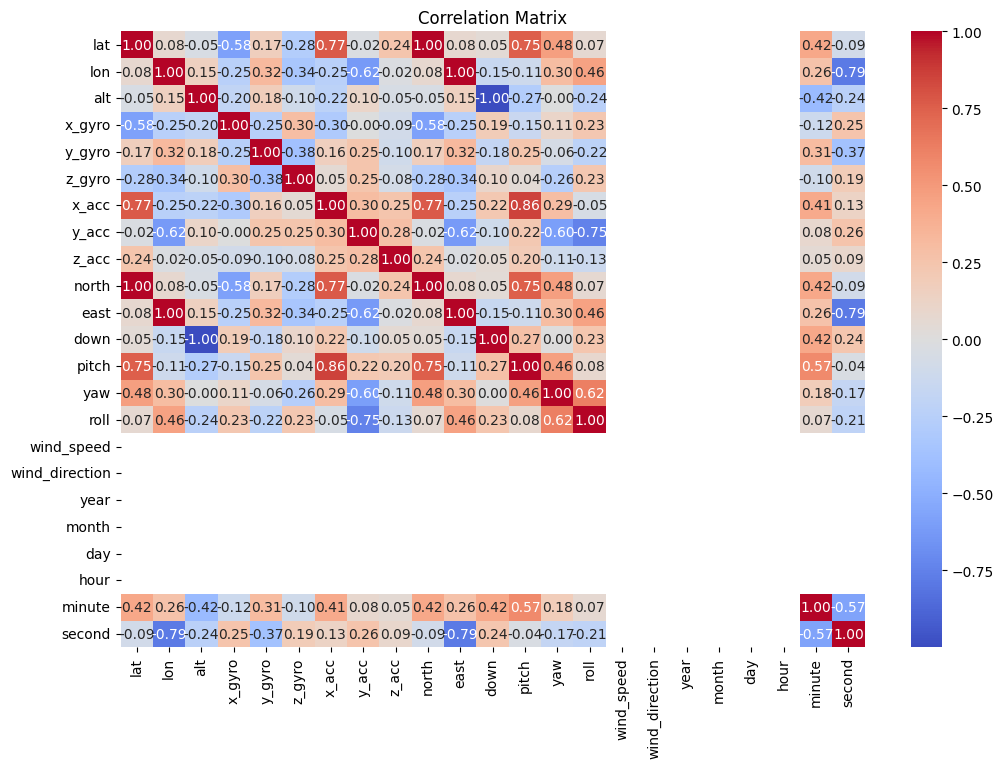

In [11]:
# Calculate correlation matrix
correlation_matrix = df1.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [12]:
df1.columns

Index(['lat', 'lon', 'alt', 'x_gyro', 'y_gyro', 'z_gyro', 'x_acc', 'y_acc',
       'z_acc', 'north', 'east', 'down', 'pitch', 'yaw', 'roll', 'wind_speed',
       'wind_direction', 'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [16]:
'''For trajectory prediction of a drone using LSTM, your target feature(s) should be the drone's future position. Specifically, the features that represent the drone's location or movement over time are important to predict, such as latitude (lat), longitude (lon), and altitude (alt).

Potential Target Features for Trajectory Prediction:
lat (Latitude): The geographical latitude of the drone.
lon (Longitude): The geographical longitude of the drone.
alt (Altitude): The altitude of the drone.
In a typical drone trajectory prediction task, you'd aim to predict these features based on the previous time steps.

Example Target Feature(s):
If you want to predict the next position of the drone in terms of latitude, longitude, and altitude, you would set:
Target (y): ['lat', 'lon', 'alt']
These would be the dependent variables (targets) you're trying to predict.
Model Setup for Multiple Targets:
Since you're predicting three target variables (latitude, longitude, and altitude), your LSTM model's output layer should have 3 output units (one for each feature).

Example Setup:
Input (Features): The features you provided (like x_gyro, y_gyro, z_gyro, pitch, yaw, etc.) will be used as input data to the LSTM model.
Input (X) = ['x_gyro', 'y_gyro', 'z_gyro', 'x_acc', 'y_acc', 'z_acc', 'north', 'east', 'down', 'pitch', 'yaw', 'roll', 'wind_speed', 'wind_direction', 'year', 'month', 'day', 'hour', 'minute', 'second']
Output (Target): You want to predict the future lat, lon, and alt:
Output (y) = ['lat', 'lon', 'alt']'''

"For trajectory prediction of a drone using LSTM, your target feature(s) should be the drone's future position. Specifically, the features that represent the drone's location or movement over time are important to predict, such as latitude (lat), longitude (lon), and altitude (alt).\n\nPotential Target Features for Trajectory Prediction:\nlat (Latitude): The geographical latitude of the drone.\nlon (Longitude): The geographical longitude of the drone.\nalt (Altitude): The altitude of the drone.\nIn a typical drone trajectory prediction task, you'd aim to predict these features based on the previous time steps.\n\nExample Target Feature(s):\nIf you want to predict the next position of the drone in terms of latitude, longitude, and altitude, you would set:\nTarget (y): ['lat', 'lon', 'alt']\nThese would be the dependent variables (targets) you're trying to predict.\nModel Setup for Multiple Targets:\nSince you're predicting three target variables (latitude, longitude, and altitude), your

In [17]:
'''Approach 2: Splitting First, Then Standardizing (Recommended)
Here’s why this is generally preferred: By splitting first, you avoid data leakage, where information from the test set could influence the training process. 
It’s better to ensure that the scaling parameters (like mean and standard deviation) are derived only from the training set and then applied to the test set.
Explanation of the Steps:
Split your dataset first using train_test_split().
Fit the StandardScaler on X_train to compute the mean and standard deviation based only on the training data.
Transform both X_train and X_test using the same scaler object:
fit_transform(X_train) to compute the parameters and scale X_train.
transform(X_test) to apply the scaling without recomputing the parameters, ensuring no leakage of information from the test set.
Why this is better:
Avoids data leakage: The test set is never used during training, so by splitting first and then scaling, you ensure the model doesn't have access to the test set's information during training.
Realistic evaluation: You simulate a real-world scenario where the model will not know anything about unseen data before it's scaled or processed.
So, to answer your question: yes, you can use train_test_split after standardization, but it's usually better to split first, then standardize the training and test sets separately.
'''

"Approach 2: Splitting First, Then Standardizing (Recommended)\nHere’s why this is generally preferred: By splitting first, you avoid data leakage, where information from the test set could influence the training process. \nIt’s better to ensure that the scaling parameters (like mean and standard deviation) are derived only from the training set and then applied to the test set.\nExplanation of the Steps:\nSplit your dataset first using train_test_split().\nFit the StandardScaler on X_train to compute the mean and standard deviation based only on the training data.\nTransform both X_train and X_test using the same scaler object:\nfit_transform(X_train) to compute the parameters and scale X_train.\ntransform(X_test) to apply the scaling without recomputing the parameters, ensuring no leakage of information from the test set.\nWhy this is better:\nAvoids data leakage: The test set is never used during training, so by splitting first and then scaling, you ensure the model doesn't have acc

In [18]:
'''Key Steps for Building and Training an LSTM Model:
-Reshape the data for time series input.
-Define and build the LSTM model.
-Train the model.
-Evaluate the model on the test set.'''

'Key Steps for Building and Training an LSTM Model:\n-Reshape the data for time series input.\n-Define and build the LSTM model.\n-Train the model.\n-Evaluate the model on the test set.'

In [19]:
'''1. Data Preparation for LSTM
An LSTM model expects the input data to be in 3D format:

(samples, timesteps, features), where:
-samples is the number of data samples,
-timesteps is the number of past time steps to look back for each prediction,
-features is the number of features (e.g., latitude, longitude, altitude, etc.).
-First, you need to reshape your data into sequences that LSTM can process.'''

'1. Data Preparation for LSTM\nAn LSTM model expects the input data to be in 3D format:\n\n(samples, timesteps, features), where:\n-samples is the number of data samples,\n-timesteps is the number of past time steps to look back for each prediction,\n-features is the number of features (e.g., latitude, longitude, altitude, etc.).\n-First, you need to reshape your data into sequences that LSTM can process.'

In [13]:
dep=['lat', 'lon', 'alt']
ind=['x_gyro', 'y_gyro', 'z_gyro', 'x_acc', 'y_acc', 'z_acc', 'north', 'east', 'down', 'pitch', 'yaw', 'roll', 'wind_speed', 'wind_direction', 'year', 'month', 'day', 'hour', 'minute', 'second']
y= df1[dep]
x=df1[ind]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# Split the dataset first
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


In [16]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (11, 20)
Shape of X_test: (8, 20)
Shape of y_train: (11, 3)
Shape of y_test: (8, 3)


In [17]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test set (but don't fit again!)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are standardized


In [18]:
print(f"Shape of X_train_scaled : {X_train_scaled .shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")


Shape of X_train_scaled : (11, 20)
Shape of X_test_scaled: (8, 20)


In [26]:
'''from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Initialize RFE with the model
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe.fit(x, y)  # Make sure to pass DataFrames to RFE

# Get selected features
selected_features = [ind[i] for i in range(len(ind)) if rfe.support_[i]]
print("Selected features:", selected_features)

# Use selected features for further modeling
X_selected = x[selected_features]  # Subset the DataFrame with selected features'''

'from sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LinearRegression\n\n# Initialize the model\nmodel = LinearRegression()\n\n# Initialize RFE with the model\nrfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features\nrfe.fit(x, y)  # Make sure to pass DataFrames to RFE\n\n# Get selected features\nselected_features = [ind[i] for i in range(len(ind)) if rfe.support_[i]]\nprint("Selected features:", selected_features)\n\n# Use selected features for further modeling\nX_selected = x[selected_features]  # Subset the DataFrame with selected features'

In [19]:
# Select only the features you want to scale
features_to_scale = [ 'x_gyro', 'y_gyro', 'z_gyro', 'year', 'month', 'day', 'hour', 'minute', 'second']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler and transform the data
X = scaler.fit_transform(x)
print(x)
# Print the scaled dataframe
#print(df1)



    x_gyro  y_gyro  z_gyro  x_acc  y_acc  z_acc      north       east  \
0     -195     141      54     18    105   -970  -0.916279   0.442863   
1      -29      68    -112   -145    -35  -1027  -8.485707   1.484865   
2      -43     -13     -16   -168   -100  -1021 -20.810673   3.492481   
3       22     -73      50   -148   -143  -1017 -33.705063   6.193039   
4      132     147      25    -99    -40   -972 -46.941650   8.006710   
5        2      64     134   -187     21   -974 -53.916504   4.657261   
6       48     -42     -11   -233    -10   -950 -55.992004  -6.577007   
7      -13     159      -6   -248     14  -1087 -58.505989 -20.293650   
8       28      -8      27   -285     64   -983 -60.121704 -34.487595   
9       76     -77     736   -105     67  -1030 -60.098633 -45.546585   
10      94      44      36    -46    114  -1065 -52.011818 -48.271194   
11      12      69       9    -85    108   -987 -39.168770 -50.177353   
12       0      -5       3    -26    140   -925 -24

In [21]:
# Define the number of time steps (look-back window)
n_steps = 5 # You can choose the look-back window based on your problem (e.g., 10 previous time steps)

In [22]:
# Convert the training data into sequences for LSTM
def create_sequences(X, y, n_steps):
    Xs, ys = [], []
    for i in range(len(X) - n_steps):
        Xs.append(X[i:i + n_steps].values)  # Get the previous 'n_steps' time steps
        ys.append(y.iloc[i + n_steps])  # The corresponding target value
    return np.array(Xs), np.array(ys)




In [23]:
X_train_seq, y_train_seq = create_sequences(X_train, y_train, n_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, n_steps)


In [24]:
# The shape of the input data should now be (samples, timesteps, features)
print(f"X_train_seq shape: {X_train_seq.shape}")
print(f"y_train_seq shape: {y_train_seq.shape}")
print(f"Shape of X_test_seq: {X_test_seq.shape}")  # Should be (samples,)
print(f"Shape of y_test_seq: {y_test_seq.shape}")  # Should be (samples,)


X_train_seq shape: (6, 5, 20)
y_train_seq shape: (6, 3)
Shape of X_test_seq: (3, 5, 20)
Shape of y_test_seq: (3, 3)


In [25]:
print(f"Length of X_test: {len(X_test)}")


Length of X_test: 8


In [26]:
# Ensure test set has enough data for sequence creation
if len(X_test) > n_steps:
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, n_steps)
    print(f"Shape of X_test_seq: {X_test_seq.shape}")
    print(f"Shape of y_test_seq: {y_test_seq.shape}")
else:
    print("Not enough test data for sequence creation.")


Shape of X_test_seq: (3, 5, 20)
Shape of y_test_seq: (3, 3)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()

# Add the LSTM layer with 50 units (neurons) and input shape corresponding to (timesteps, features)
model.add(LSTM(units=50, return_sequences=False, input_shape=(n_steps, X_train_seq.shape[2])))

# Optionally, add a Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add the output layer (1 unit if predicting one value like future latitude, or multiple units if multivariate output)
model.add(Dense(3))  # Replace '1' with the number of outputs if you have more (e.g., 3 for lat, lon, alt)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


c:\Users\vines\kanikamtech\trajectory_prediction\LSTM\day_wise_implementation\october\4thoct\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,353 (56.07 KB)

 Trainable params: 14,353 (56.07 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
print(f"Shape of X_train_seq: {X_train_seq.shape}")  # Should be (samples, timesteps, features)
print(f"Shape of X_test_seq: {X_test_seq.shape}")
print(f"Shape of y_test_seq: {y_test_seq.shape}")

Shape of X_train_seq: (6, 5, 20)
Shape of X_test_seq: (3, 5, 20)
Shape of y_test_seq: (3, 3)


In [29]:
print(X_train.head())  # To verify the structure
print(y_train.head())  # To verify the structure


    x_gyro  y_gyro  z_gyro  x_acc  y_acc  z_acc      north       east  \
15     -61       6      28     84      4   -979  -3.239848 -37.101067   
17      -9      53      42     31      8   -997   0.595400  -8.676702   
2      -43     -13     -16   -168   -100  -1021 -20.810673   3.492481   
9       76     -77     736   -105     67  -1030 -60.098633 -45.546585   
18     -29     152       4     41     83   -984   1.553775   0.810886   

         down     pitch       yaw      roll  wind_speed  wind_direction  year  \
15 -19.933899 -0.038670  1.392608  0.039148          20             270  2020   
17 -19.861912  0.008092  1.440840  0.038352          20             270  2020   
2  -20.383051 -0.121941  2.980288  0.101160          20             270  2020   
9  -20.259623 -0.122772 -0.746451  0.080177          20             270  2020   
18 -19.872606  0.183065  1.417797  0.005025          20             270  2020   

    month  day  hour  minute  second  
15      6   16    11      20      5

In [30]:
print(len(X_train))  # Ensure this is greater than n_steps (e.g., 10)


11


In [31]:
# LSTM model definition
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(n_steps, X_train_seq.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(3))  # Output layer for single output (e.g., predicting lat, lon, or alt)

model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\vines\kanikamtech\trajectory_prediction\LSTM\day_wise_implementation\october\4thoct\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
history = model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_data=(X_test_seq, y_test_seq))




Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step - loss: 5141.6738 - val_loss: 5128.4878
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5126.2822 - val_loss: 5127.4038
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5099.2505 - val_loss: 5126.3169
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5106.3882 - val_loss: 5125.2383
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5116.8359 - val_loss: 5124.1582
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5125.3921 - val_loss: 5123.0864
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5120.0190 - val_loss: 5122.0093
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5130.4438 - val_loss: 5120.8594
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5116.6455 - val_loss: 5116.2329
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5102.4927 - val_loss: 5105.2036
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5107.6050 - val_loss: 5103.5923
Epoch 12/50
1/1 ━━

In [33]:
print(f"Shape of X_test_seq: {X_test_seq.shape}")


Shape of X_test_seq: (3, 5, 20)


In [34]:
if len(X_test_seq) == 0:
    print("Test set is empty, cannot make predictions.")
else:
    y_pred = model.predict(X_test_seq)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [35]:
# Make predictions on the test set
y_pred = model.predict(X_test_seq)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [36]:
# Ensure test set has enough data for sequence creation
if len(X_test) > n_steps:
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, n_steps)
    print(f"Shape of X_test_seq: {X_test_seq.shape}")
    print(f"Shape of y_test_seq: {y_test_seq.shape}")
else:
    print("Not enough test data for sequence creation.")


Shape of X_test_seq: (3, 5, 20)
Shape of y_test_seq: (3, 3)


In [37]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_seq, y_pred)
mae = mean_absolute_error(y_test_seq, y_pred)
r2 = r2_score(y_test_seq, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 5034.900395160587
Mean Absolute Error: 53.64133676746389
R^2 Score: -95298376735.34229


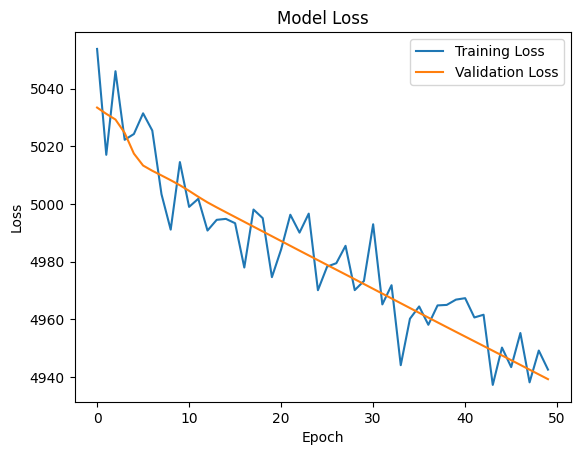

In [45]:
import matplotlib.pyplot as plt

# Plot the training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [51]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32), 
                   return_sequences=False, 
                   input_shape=(n_steps, X_train_seq.shape[2])))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Increase to explore more hyperparameter combinations
    executions_per_trial=2,  # Average results across multiple runs
    directory='tuning',
    project_name='lstm_trajectory_v2'
)

'''tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='tuning',
    project_name='lstm_trajectory'
)'''

# Start the hyperparameter search
tuner.search(X_train_seq, y_train_seq, epochs=20, validation_data=(X_test_seq, y_test_seq))


Trial 10 Complete [00h 00m 04s]
val_loss: 5135.808837890625

Best val_loss So Far: 4877.635498046875
Total elapsed time: 00h 00m 42s


Step 1: Evaluate the Model on Test Data
After tuning, you can retrieve the best model and evaluate it on your test set (X_test_seq, y_test_seq). This will give you a better idea of how well it generalizes to unseen data.

In [52]:
# Retrieve the best model from the tuning process
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the model on test data
test_loss = best_model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {test_loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 4839.4253
Test Loss: 4839.42529296875


c:\Users\vines\kanikamtech\trajectory_prediction\LSTM\day_wise_implementation\october\4thoct\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Step 2: Visualize Predictions
Visualizing the predicted trajectories vs. the actual trajectories will give you a clear idea of how well the model is performing. You can plot some of the predictions against the actual data.

The error message IndexError: index 3 is out of bounds for axis 0 with size 3 indicates that your predictions array or y_test_seq contains fewer than 5 samples. Specifically, it looks like there are only 3 samples in predictions (or y_test_seq), so when you're trying to access predictions[3], it's out of bounds.

How to Fix It
You need to make sure that you're not trying to plot more samples than are available in predictions or y_test_seq. You can modify your code to check the length of predictions or y_test_seq before plotting.

Here’s an updated version of your code that will adjust the range of the plot loop dynamically based on the actual size of the predictions array:
Explanation:
num_samples is calculated as the minimum of the lengths of predictions and y_test_seq, ensuring that you only try to plot as many samples as are available in both arrays.
The loop iterates only up to num_samples, which prevents the IndexError from occurring.
This should solve the error and plot the available samples without exceeding the bounds of your data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


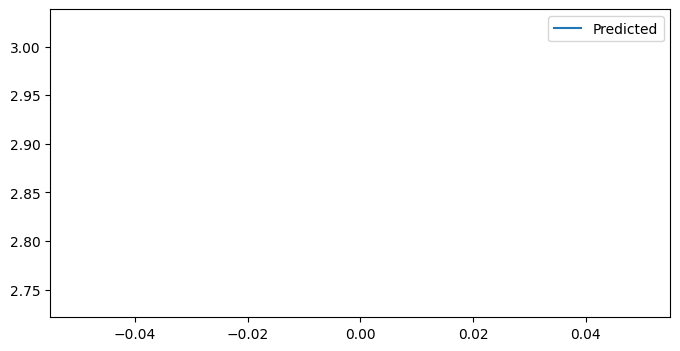

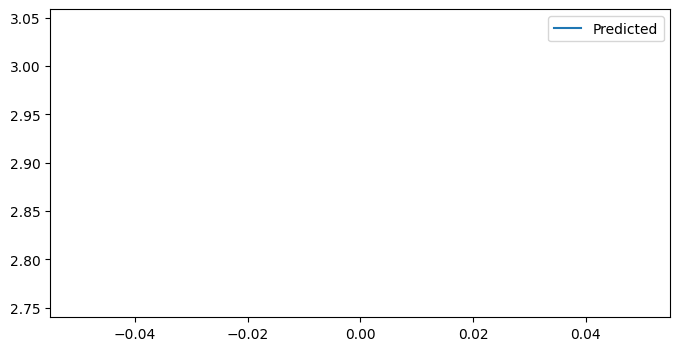

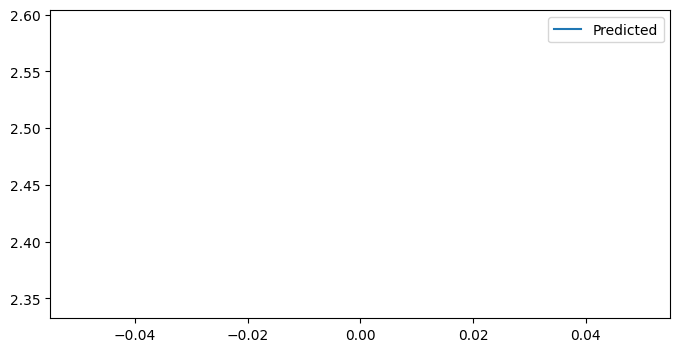

In [55]:
import matplotlib.pyplot as plt

# Make predictions using the best model
predictions = best_model.predict(X_test_seq)

# Determine how many samples are available
num_samples = min(len(predictions), len(y_test_seq))

# Plot the predicted and actual values for available samples
for i in range(num_samples):  # Plot available trajectories
    plt.figure(figsize=(8, 4))
    plt.plot(predictions[i], label='Predicted')
    #plt.plot(y_test_seq[i], label='Actual')
    plt.legend()
    plt.show()


Step 3: Analyze and Adjust
Inspect learning curve: Check the training and validation losses across epochs to see if your model is overfitting (too low training loss but high validation loss) or underfitting (both losses are high).

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step - loss: 4870.0303 - val_loss: 4870.9062
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4907.4116 - val_loss: 4868.0669
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 4870.2388 - val_loss: 4865.2070
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4847.1362 - val_loss: 4861.8066
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4861.7622 - val_loss: 4858.3882
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 4862.9722 - val_loss: 4855.5435
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4862.7705 - val_loss: 4852.7124
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 4840.0601 - val_loss: 4849.7842
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4847.7202 - val_loss: 4846.6855
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4842.4551 - val_loss: 4843.4614
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4842.9214 - val_loss: 4840.2441
Epoch 12/20
1/1 ━━

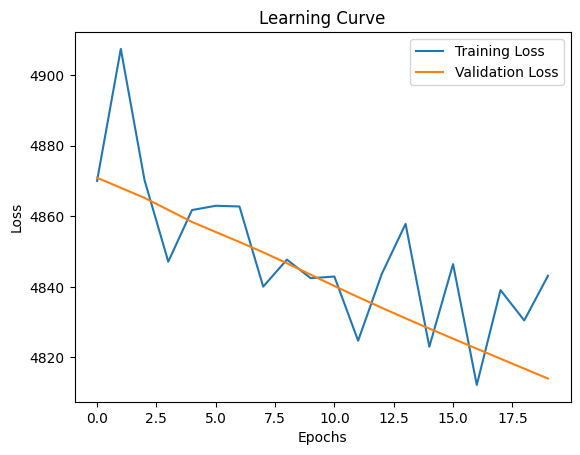

In [43]:
# Retrieve the best model from the tuning process
best_model = tuner.get_best_models(num_models=1)[0]

# Since the tuner itself doesn't store the training history, 
# you can retrain the best model and capture its history.
history = best_model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Plot the learning curve: Training Loss vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Step 4: Fine-tune Hyperparameters Further
The current tuning process explored a limited range of hyperparameters (e.g., units and dropout). You can further tune the model by:

Adding more trials in the RandomSearch process (max_trials=10, for example).
Exploring other hyperparameters, like the learning rate of the Adam optimizer, or trying different optimizers.

In [49]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Increase to explore more hyperparameter combinations
    executions_per_trial=2,  # Average results across multiple runs
    directory='tuning',
    project_name='lstm_trajectory_v2'
)


Step 1: Make Predictions Using the Best Model
Once the hyperparameter tuning is complete, you can retrieve the best model and make predictions on your test data (X_test_seq).

In [56]:
# Retrieve the best model from the tuning process
best_model = tuner.get_best_models(num_models=1)[0]

# Make predictions on the test set
predictions = best_model.predict(X_test_seq)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Step 2: Calculate Accuracy or Performance Metric
For trajectory prediction, typical accuracy metrics include Mean Squared Error (MSE) or Mean Absolute Error (MAE) because this is a regression problem, not a classification problem. You can calculate the error between the predicted and actual values.

Here’s how to calculate MSE and MAE on your predictions:

In [58]:
print(f"y_test_seq shape: {y_test_seq.shape}")
print(f"predictions shape: {predictions.shape}")

y_test_seq shape: (3, 3)
predictions shape: (3, 1)


In [59]:
# Reshape predictions to match y_test_seq if necessary
predictions = np.repeat(predictions, y_test_seq.shape[1], axis=1)  # Assuming repeating is valid


In [60]:
print(f"y_test_seq shape: {y_test_seq.shape}")
print(f"predictions shape: {predictions.shape}")

y_test_seq shape: (3, 3)
predictions shape: (3, 3)


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(y_test_seq, predictions)
mae = mean_absolute_error(y_test_seq, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 4839.425505688388
Mean Absolute Error (MAE): 51.66658180811903


Step 3: Visualize Path Prediction
You can visualize the predicted paths against the actual paths to better understand the performance of your model.
predictions[i]: This represents the predicted path for the ith sample from X_test_seq.
y_test_seq[i]: This is the actual path corresponding to the ith sample.
The visual comparison between the predicted and actual trajectories will give you an idea of how well your LSTM model captures the path dynamics.

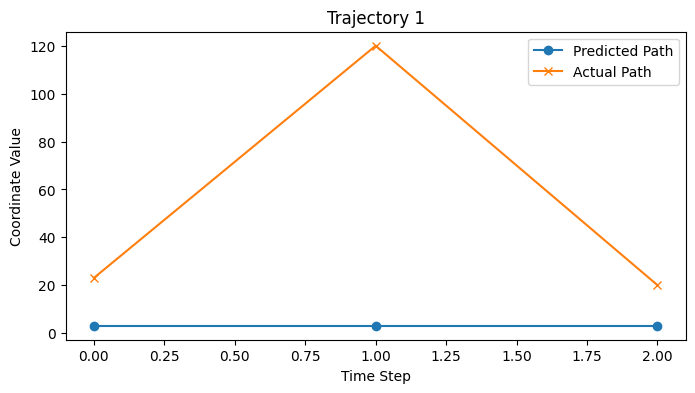

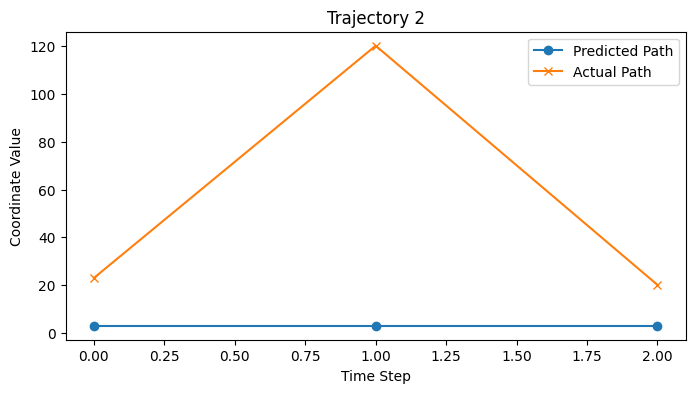

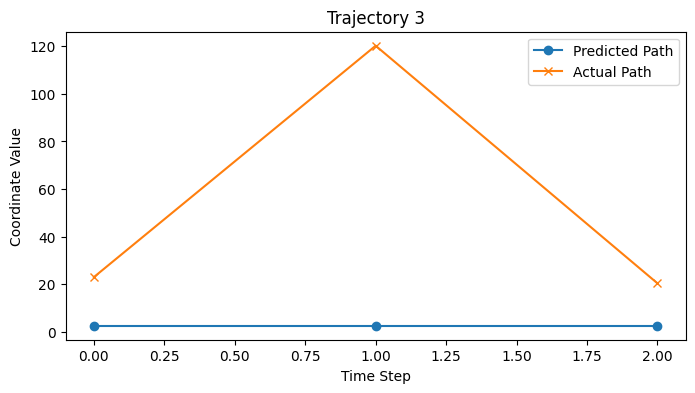

In [63]:
import matplotlib.pyplot as plt

# Determine the number of samples available (use the minimum of predictions and y_test_seq)
num_samples = min(len(predictions), len(y_test_seq))

# Plot for the available number of samples (max 5 or num_samples)
for i in range(min(5, num_samples)):  # Plot for up to 5 trajectories, or fewer if num_samples < 5
    plt.figure(figsize=(8, 4))
    plt.plot(predictions[i], label='Predicted Path', marker='o')
    plt.plot(y_test_seq[i], label='Actual Path', marker='x')
    plt.title(f'Trajectory {i+1}')
    plt.xlabel('Time Step')
    plt.ylabel('Coordinate Value')
    plt.legend()
    plt.show()


Step 5: (Optional) Save the Model
If the results look good and you are satisfied with the performance, you can save the model for future use.

In [66]:
# Save the best model

model.save('my_model.keras')

You can later load the saved model using:

In [ ]:
from keras.models import load_model
loaded_model = load_model('best_lstm_trajectory_model.h5')


Step 1: Analyze Prediction Errors
Interpret MSE and MAE: Compare your calculated Mean Squared Error (MSE) and Mean Absolute Error (MAE) with typical values for your problem domain. If the errors are too high, consider model improvements.
Error Distribution: Plot a histogram of the errors to see if there are any outliers or patterns in the predictions.

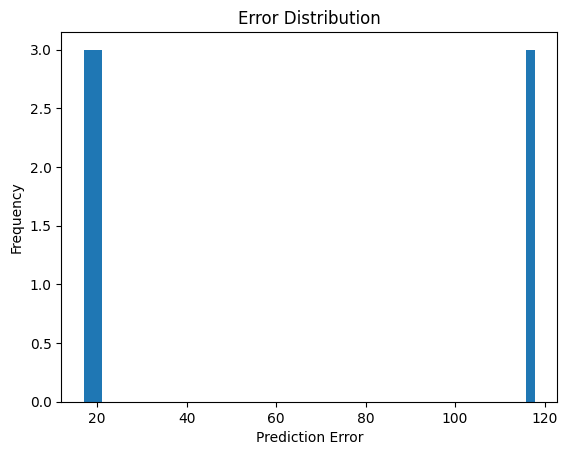

In [67]:
errors = y_test_seq - predictions
plt.hist(errors.flatten(), bins=50)
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()


Stacked LSTMs: You can try a more complex architecture, such as stacked LSTMs, where you add more LSTM layers to capture more sophisticated temporal dynamics.
GRU: Consider using GRU (Gated Recurrent Units), which are similar to LSTMs but might perform better or more efficiently on some datasets.

Summary of Steps:
Make predictions on the test data.
Calculate MSE and MAE to quantify the prediction error.
Visualize the predicted paths against the actual paths.
Optionally, save the best model for future use.